## Общие методы для обработки данных
В данном разделе будут находится общие методы.

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# читаем данные и создаём таблицу
def data_loader(path: str):
    return pd.read_csv(path)

# преобразуем данные так, как нам необходимо
def data_type_and_date_transform(data: pd.DataFrame) ->pd.DataFrame:
    data = data.replace(",", "", regex=True)
    data.Date = pd.to_datetime((data.Date - 25200) * 1e9 ) # Почему-то данные смещены на 7 часов относительно торгов(возможно, и не на 7, но при данном смещении одна торговая сессия укладывается в дневные промежутки)
    data = data.sort_values(by=["Date"])
    data.set_index('Date')
    data.Close = data.Close.astype(float)
    data.High = data.High.astype(float)
    data.Low = data.Low.astype(float)
    data.Open = data.Open.astype(float)
    return data

# Обрезает данные по дате. 
# Важно, чтобы даты в датафрейме были в том же формате что и начальная и конечная дата
def cut_by_date(data: pd.DataFrame, begin_date: str, end_date: str) -> pd.DataFrame:
     result = data[(data['Date'] > begin_date) & (data['Date'] < end_date)]
     result.index = data.index[:len(result)]
     return result

In [99]:
# Считываем данные
general_data = data_loader("../../Data/Minute/2019-2023-SANDP-500UP.csv")
general_data = data_type_and_date_transform(general_data)

C:\Users\Skiv2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arrays\datetimes.py:2407: RuntimeWarning: invalid value encountered in cast
  data = data.astype(DT64NS_DTYPE).view("i8")


In [100]:
general_data.head(20)

,Date,Open,High,Low,Close,Vol
0,2019-01-02 05:31:00,2476.96,2476.96,2470.40,2471.18,51
1,2019-01-02 05:32:00,2470.98,2474.09,2470.80,2473.85,59
2,2019-01-02 05:33:00,2473.70,2473.70,2471.26,2471.44,57
3,2019-01-02 05:34:00,2471.30,2471.93,2469.64,2471.93,42
4,2019-01-02 05:35:00,2471.88,2472.49,2470.11,2471.07,56
5,2019-01-02 05:36:00,2467.87,2470.54,2467.87,2468.71,30
6,2019-01-02 05:37:00,2468.78,2471.60,2468.78,2471.60,58
7,2019-01-02 05:38:00,2471.80,2474.46,2471.55,2474.46,59
8,2019-01-02 05:39:00,2474.55,2474.59,2470.74,2471.36,55
9,2019-01-02 05:40:00,2471.64,2474.18,2470.78,2473.25,59


In [101]:
# Производим обрезку данных 
special_data = cut_by_date(general_data, "2019-01-01", "2023-01-01")

In [102]:
# Проверяем получилось ли сделать обрезку
special_data

,Date,Open,High,Low,Close,Vol
0,2019-01-02 05:31:00,2476.96,2476.96,2470.40,2471.18,51
1,2019-01-02 05:32:00,2470.98,2474.09,2470.80,2473.85,59
2,2019-01-02 05:33:00,2473.70,2473.70,2471.26,2471.44,57
3,2019-01-02 05:34:00,2471.30,2471.93,2469.64,2471.93,42
4,2019-01-02 05:35:00,2471.88,2472.49,2470.11,2471.07,56
...,...,...,...,...,...,...
567166,2022-12-31 10:00:00,3839.50,3839.50,3839.50,3839.50,43
567167,2022-12-31 11:00:00,3839.50,3839.50,3839.50,3839.50,37
567168,2022-12-31 12:00:00,3839.50,3839.50,3839.50,3839.50,43
567169,2022-12-31 13:00:00,3839.50,3839.50,3839.50,3839.50,44


In [103]:
special_data['new_index'] = special_data.Close
special_data['new_date'] = special_data.Close
special_data.head()

C:\Users\Skiv2\AppData\Local\Temp\ipykernel_23888\85445124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  special_data['new_index'] = special_data.Close
C:\Users\Skiv2\AppData\Local\Temp\ipykernel_23888\85445124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  special_data['new_date'] = special_data.Close


,Date,Open,High,Low,Close,Vol,new_index,new_date
0,2019-01-02 05:31:00,2476.96,2476.96,2470.40,2471.18,51,2471.18,2471.18
1,2019-01-02 05:32:00,2470.98,2474.09,2470.80,2473.85,59,2473.85,2473.85
2,2019-01-02 05:33:00,2473.70,2473.70,2471.26,2471.44,57,2471.44,2471.44
3,2019-01-02 05:34:00,2471.30,2471.93,2469.64,2471.93,42,2471.93,2471.93
4,2019-01-02 05:35:00,2471.88,2472.49,2470.11,2471.07,56,2471.07,2471.07


In [104]:
import datetime
import calendar
import time
# Получаем значения начального дня(в тестовом варианте это значение получается равным 1262563200)
special_data.loc[0, 'new_index'] = calendar.timegm(time.strptime(str(special_data.Date[0]), '%Y-%m-%d %H:%M:%S')) 
special_data.loc[0, 'new_date'] = pd.to_datetime(special_data.new_index[0] * 1e9)
for i in range(len(special_data.new_index)):
    if i > 0:
        special_data.loc[i, 'new_index'] = special_data.new_index[i - 1] + 60
        special_data.loc[i, 'new_date'] = pd.to_datetime(special_data.new_index[i] * 1e9)

C:\Users\Skiv2\AppData\Local\Temp\ipykernel_23888\3669775246.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2019-01-02 05:31:00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  special_data.loc[0, 'new_date'] = pd.to_datetime(special_data.new_index[0] * 1e9)
C:\Users\Skiv2\AppData\Local\Temp\ipykernel_23888\3669775246.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  special_data.loc[i, 'new_index'] = special_data.new_index[i - 1] + 60


In [105]:
def get_data_by_date(df, target_date: str):
    target_date = pd.to_datetime(target_date)
    # Фильтрация записей
    filtered_df = df[df['Date'].dt.date == target_date.date()]
    return filtered_df

def show_plot_number_of_data_per_date(df):
    # Создание гистограммы
    filtered_df = df['Date'].dt.date
    histogram_data = filtered_df.value_counts().sort_index()

    # Построение гистограммы
    plt.bar(histogram_data.index, histogram_data.values)
    plt.xlabel('Дата')
    plt.ylabel('Количество записей')
    plt.title('Гистограмма количества записей по дням')
    plt.xticks(rotation = 45)
    plt.tight_layout()
    plt.show()

def get_max_data_size(df):
    # Создание гистограммы
    filtered_df = df['Date'].dt.date
    histogram_data = filtered_df.value_counts().sort_index()

    # Получение максимального значения
    max_count = histogram_data.max()
    return max_count

In [106]:
target_date_str = "2019-01-01"

In [107]:
# Преобразование даты для фильтрации к типу datetime
target_date = pd.to_datetime(target_date_str)

In [108]:

# Фильтрация записей
filtered_df = special_data[special_data['Date'].dt.date == target_date.date()]

In [109]:
target_date.date()

datetime.date(2019, 1, 1)

In [110]:
len(filtered_df)

0

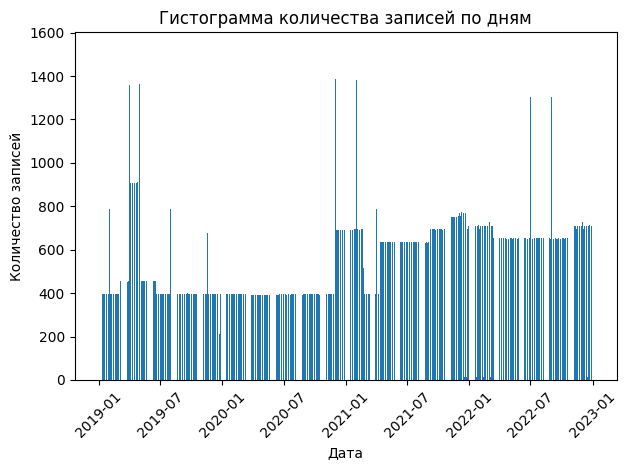

In [111]:
show_plot_number_of_data_per_date(special_data)

In [112]:
special_data.head()

,Date,Open,High,Low,Close,Vol,new_index,new_date
0,2019-01-02 05:31:00,2476.96,2476.96,2470.40,2471.18,51.0,1.546407e+09,2019-01-02 05:31:00
1,2019-01-02 05:32:00,2470.98,2474.09,2470.80,2473.85,59.0,1.546407e+09,2019-01-02 05:32:00
2,2019-01-02 05:33:00,2473.70,2473.70,2471.26,2471.44,57.0,1.546407e+09,2019-01-02 05:33:00
3,2019-01-02 05:34:00,2471.30,2471.93,2469.64,2471.93,42.0,1.546407e+09,2019-01-02 05:34:00
4,2019-01-02 05:35:00,2471.88,2472.49,2470.11,2471.07,56.0,1.546407e+09,2019-01-02 05:35:00


In [113]:
# Получение часов из даты
special_data['hour']  = special_data['Date'].dt.hour

# Группировка по часам и выбор последней минуты в каждой группе
result = special_data.groupby('hour').apply(lambda x: x[x['Date'] == x['Date'].max()])

# Удаление временной колонки
result.drop(columns = ['hour'], inplace = True)
special_data.drop(columns = ['hour'], inplace = True)
print(result)

                           Date     Open     High      Low    Close    Vol  \
hour                                                                         
0.0  567156 2022-12-31 00:00:00  3839.50  3839.50  3839.50  3839.50   43.0   
1.0  567157 2022-12-31 01:00:00  3839.50  3839.50  3839.50  3839.50   38.0   
2.0  567158 2022-12-31 02:00:00  3839.50  3839.50  3839.50  3839.50   48.0   
3.0  567159 2022-12-31 03:00:00  3839.50  3839.50  3839.50  3839.50   41.0   
4.0  567171 2022-12-31 04:10:00  3839.50  3839.50  3839.50  3839.50   49.0   
5.0  567161 2022-12-31 05:00:00  3839.50  3839.50  3839.50  3839.50   39.0   
6.0  567162 2022-12-31 06:00:00  3839.50  3839.50  3839.50  3839.50   46.0   
7.0  567163 2022-12-31 07:00:00  3839.50  3839.50  3839.50  3839.50   41.0   
8.0  567164 2022-12-31 08:00:00  3839.50  3839.50  3839.50  3839.50   42.0   
9.0  567165 2022-12-31 09:00:00  3839.50  3839.50  3839.50  3839.50   45.0   
10.0 567166 2022-12-31 10:00:00  3839.50  3839.50  3839.50  3839

In [114]:
# Функция для фильтрации последней минуты в часе
def filter_last_minute_in_hour(group):
    return group[group['Date'] == group['Date'].max()]

def minute_to_hours_transfer(df):
    df.set_index('Date', inplace = True)
    return df.groupby(pd.Grouper(freq='H')).last()

def minute_to_day_transfer(df):
    return df.groupby(df['Date'].dt.date).apply(lambda x: x.nlargest(1, columns='Date'))

# Вычисление последней минуты последнего дня в неделе
def last_minute_of_last_weekday(group):
    return group[group.dt.weekday == group.dt.weekday.max()].tail(1)

def minute_to_weeks_transfer(df):
    df.set_index('Date', inplace = True)
    return df.groupby(df.index.to_period('W')).last()

def minute_to_month_transfer(df):
    df.set_index('Date', inplace = True)
    return df.groupby(df.index.to_period('M')).last()

In [115]:
special_data = special_data.drop(columns=['new_index', 'new_date'])

In [116]:
a = special_data.copy(deep = True)
b = special_data.copy(deep = True)
c = special_data.copy(deep = True)
z = special_data.copy(deep = True)

In [117]:
d = minute_to_hours_transfer(a)
e = minute_to_day_transfer(b)
e = e.droplevel(level=1)
f = minute_to_weeks_transfer(c)
g = minute_to_month_transfer(z)
f.reset_index(inplace = True)
f['Period_start'] = f['Date'].astype('datetime64[ns]')
f['Period_end'] = f['Period_start'] + pd.DateOffset(days = 6)
f.set_index('Period_end', inplace = True)
g['LastDayOfMonth'] = g.index.to_timestamp('M').to_period('D').end_time
g.reset_index(inplace = True)
g.set_index('LastDayOfMonth', inplace = True)

In [118]:
a.head(40)

,Open,High,Low,Close,Vol
Date,,,,,
2019-01-02 05:31:00,2476.96,2476.96,2470.40,2471.18,51.0
2019-01-02 05:32:00,2470.98,2474.09,2470.80,2473.85,59.0
2019-01-02 05:33:00,2473.70,2473.70,2471.26,2471.44,57.0
2019-01-02 05:34:00,2471.30,2471.93,2469.64,2471.93,42.0
2019-01-02 05:35:00,2471.88,2472.49,2470.11,2471.07,56.0
2019-01-02 05:36:00,2467.87,2470.54,2467.87,2468.71,30.0
2019-01-02 05:37:00,2468.78,2471.60,2468.78,2471.60,58.0
2019-01-02 05:38:00,2471.80,2474.46,2471.55,2474.46,59.0
2019-01-02 05:39:00,2474.55,2474.59,2470.74,2471.36,55.0


In [119]:
d

,Open,High,Low,Close,Vol
Date,,,,,
2019-01-02 05:00:00,2479.15,2479.99,2478.32,2478.56,56.0
2019-01-02 06:00:00,2498.24,2498.59,2497.22,2498.50,56.0
2019-01-02 07:00:00,2500.98,2501.45,2498.87,2498.87,54.0
2019-01-02 08:00:00,2509.74,2510.48,2509.57,2510.15,55.0
2019-01-02 09:00:00,2517.05,2517.30,2515.96,2516.98,58.0
...,...,...,...,...,...
2022-12-31 10:00:00,3839.50,3839.50,3839.50,3839.50,43.0
2022-12-31 11:00:00,3839.50,3839.50,3839.50,3839.50,37.0
2022-12-31 12:00:00,3839.50,3839.50,3839.50,3839.50,43.0


In [120]:
e.head(10)

,Date,Open,High,Low,Close,Vol
Date,,,,,,
2019-01-02,2019-01-02 12:04:00,2510.02,2510.03,2510.02,2510.03,2.0
2019-01-03,2019-01-03 12:04:00,2447.87,2447.89,2447.87,2447.89,3.0
2019-01-04,2019-01-04 12:04:00,2531.93,2531.94,2531.93,2531.94,2.0
2019-01-07,2019-01-07 12:05:00,2549.69,2549.69,2549.69,2549.69,1.0
2019-01-08,2019-01-08 12:04:00,2574.41,2574.41,2574.41,2574.41,1.0
2019-01-09,2019-01-09 12:03:00,2584.93,2584.96,2584.93,2584.96,10.0
2019-01-10,2019-01-10 12:07:00,2596.64,2596.64,2596.64,2596.64,1.0
2019-01-11,2019-01-11 12:05:00,2596.27,2596.27,2596.26,2596.26,2.0
2019-01-14,2019-01-14 12:05:00,2582.61,2582.61,2582.61,2582.61,1.0


In [121]:
f

,Date,Open,High,Low,Close,Vol,Period_start
Period_end,,,,,,,
2019-01-06,2018-12-31/2019-01-06,2531.93,2531.94,2531.93,2531.94,2.0,2018-12-31
2019-01-13,2019-01-07/2019-01-13,2596.27,2596.27,2596.26,2596.26,2.0,2019-01-07
2019-01-20,2019-01-14/2019-01-20,2671.14,2671.14,2670.71,2670.71,16.0,2019-01-14
2019-01-27,2019-01-21/2019-01-27,2664.76,2664.76,2664.76,2664.76,1.0,2019-01-21
2019-02-03,2019-01-28/2019-02-03,2706.51,2706.53,2706.51,2706.53,3.0,2019-01-28
...,...,...,...,...,...,...,...
2022-12-04,2022-11-28/2022-12-04,4071.70,4071.70,4071.70,4071.70,138.0,2022-11-28
2022-12-11,2022-12-05/2022-12-11,3934.38,3934.38,3934.38,3934.38,154.0,2022-12-05
2022-12-18,2022-12-12/2022-12-18,3852.36,3852.36,3852.36,3852.36,89.0,2022-12-12


In [122]:
g

,Date,Open,High,Low,Close,Vol
LastDayOfMonth,,,,,,
2019-01-31 23:59:59.999999999,2019-01,2704.10,2704.10,2704.10,2704.10,1.0
2019-02-28 23:59:59.999999999,2019-02,2784.49,2784.49,2784.48,2784.49,5.0
2019-03-31 23:59:59.999999999,2019-03,2834.40,2834.40,2834.40,2834.40,1.0
2019-04-30 23:59:59.999999999,2019-04,2945.82,2945.83,2945.82,2945.83,2.0
2019-05-31 23:59:59.999999999,2019-05,2752.06,2752.07,2752.06,2752.06,5.0
2019-06-30 23:59:59.999999999,2019-06,2941.76,2941.76,2941.76,2941.76,1.0
2019-07-31 23:59:59.999999999,2019-07,2980.38,2980.38,2980.38,2980.38,1.0
2019-08-31 23:59:59.999999999,2019-08,2926.46,2926.46,2926.46,2926.46,1.0
2019-09-30 23:59:59.999999999,2019-09,2976.74,2976.74,2976.74,2976.74,1.0


In [123]:
d.to_csv("../../Data/Hour/2019-2023-sand500_MinuteToHour.csv")

In [124]:
e.to_csv("../../Data/Day/2019-2023-sand500_MinuteToDay.csv")

In [125]:
f.to_csv("../../Data/Week/2019-2023-sand500_MinuteToWeek.csv")

In [126]:
g.to_csv("../../Data/Month/2019-2023-sand500_MinuteToMonth.csv")

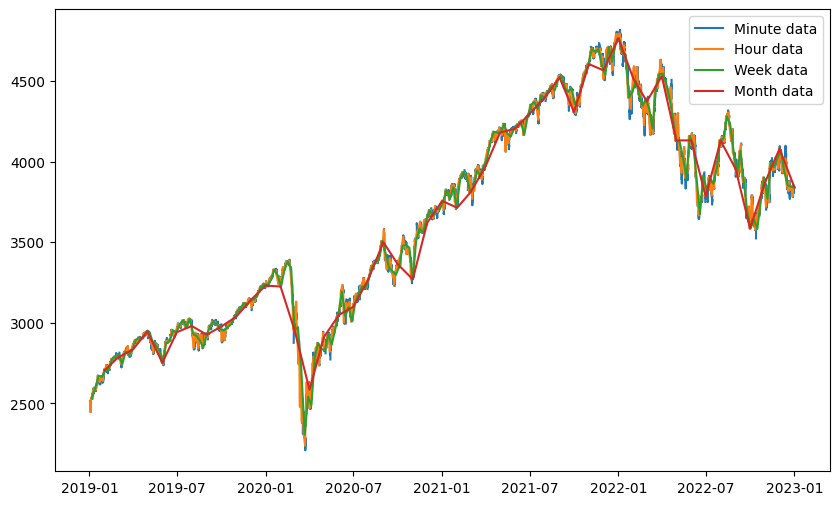

In [127]:
plt.figure(figsize=(10, 6))
plt.plot(d.Close, label = "Minute data")
plt.plot(e.Close, label = "Hour data")
plt.plot(f.Close, label = "Week data")
plt.plot(g.Close, label = "Month data")
plt.legend()

In [128]:
# преобразуем данные так, как нам необходимо
def data_type_and_date_transform_alter(data: pd.DataFrame) ->pd.DataFrame:
    data = data.replace(",", "", regex=True)
    data.Date = pd.to_datetime(data.Date)
    if 'Ticker' in data:
        data = data.drop(columns = ['Ticker'])
    if 'Per' in data:
        data = data.drop(columns = ['Per'])
    if 'Date.1' in data:
        data = data.drop(columns = ['Date.1'])
    data = data.sort_values(by=["Date"])
    data.set_index('Date')
    if "Price" in data:
        data = data.rename(columns={'Price': 'Close'})
    data.Close = data.Close.astype(float)
    data.High = data.High.astype(float)
    data.Low = data.Low.astype(float)
    data.Open = data.Open.astype(float)
    if 'Vol' in data:
        data["Vol"] = data["Vol"].astype(float)
    return data

def data_type_and_date_transform(data: pd.DataFrame) ->pd.DataFrame:
    data = data.replace(",", "", regex=True)
    data.Date = pd.to_datetime(data.Date)
    data = data.sort_values(by=["Date"])
    data.set_index('Date')
    data.Price = data.Price.astype(float)
    data.High = data.High.astype(float)
    data.Low = data.Low.astype(float)
    data.Open = data.Open.astype(float)
    data["Vol."] = data["Vol."].astype(float)
    return data

In [129]:
# Считываем данные
general_data = data_loader("../../Data/Hour/2019-2023-sand500_MinuteToHour.csv")
general_data = data_type_and_date_transform_alter(general_data)
a = general_data

In [130]:
# Считываем данные
general_data = data_loader("../../Data/Day/2019-2023-sand500_MinuteToDay.csv")
general_data = data_type_and_date_transform_alter(general_data)
b = general_data

In [131]:
# Считываем данные
general_data = data_loader("../../Data/Week/2019-2023-sand500_MinuteToWeek.csv")
general_data = data_type_and_date_transform_alter(general_data)
c = general_data

C:\Users\Skiv2\AppData\Local\Temp\ipykernel_23888\2583736011.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data.Date = pd.to_datetime(data.Date)


ValueError: Parsed string "2019-01-21/2019-01-27" gives an invalid tzoffset, which must be between -timedelta(hours=24) and timedelta(hours=24), at position 3

In [132]:
# Считываем данные
general_data = data_loader("../../Data/Month/2019-2023-sand500_MinuteToMonth.csv")
general_data = data_type_and_date_transform_alter(general_data)
d = general_data

In [133]:
# Необходимо развернуть данные и исправить индексы
a.index = a.index[::-1]
b.index = b.index[::-1]
c.index = c.index[::-1]
d.index = d.index[::-1]

In [134]:
# Преобразуем столбец 'Date' в формат datetime
a['Date'] = pd.to_datetime(a['Date'])

# Устанавливаем 'Date' как индекс DataFrame
a.set_index('Date', inplace=True)

# Создадим новый DataFrame с требуемым диапазоном дат
start_date = a.index.min()
end_date = a.index.max()
date_range = pd.date_range(start= start_date, end = end_date, freq='H')

# Переиндексируем исходный DataFrame с новым диапазоном дат
df_resampled = a.reindex(date_range)

# Интерполируем пропущенные значения
df_resampled.interpolate(method='time', inplace=True)

# Сбросим индекс, чтобы столбец 'Date' снова стал обычным столбцом
df_resampled.reset_index(inplace=True)
df_resampled.rename(columns={'index': 'Date'}, inplace=True)

df_resampled.to_csv("../../Data/Hour/2019-2023-sand500_MinuteToHour_Linear.csv") 

In [135]:
df_resampled.head(20)

,Date,Open,High,Low,Close,Vol
0,2019-01-02 05:00:00,2479.15,2479.990000,2478.320000,2478.560000,56.000000
1,2019-01-02 06:00:00,2498.24,2498.590000,2497.220000,2498.500000,56.000000
2,2019-01-02 07:00:00,2500.98,2501.450000,2498.870000,2498.870000,54.000000
3,2019-01-02 08:00:00,2509.74,2510.480000,2509.570000,2510.150000,55.000000
4,2019-01-02 09:00:00,2517.05,2517.300000,2515.960000,2516.980000,58.000000
5,2019-01-02 10:00:00,2509.87,2509.870000,2507.860000,2508.080000,49.000000
6,2019-01-02 11:00:00,2508.22,2508.320000,2506.860000,2507.040000,55.000000
7,2019-01-02 12:00:00,2510.02,2510.030000,2510.020000,2510.030000,2.000000
8,2019-01-02 13:00:00,2508.22,2508.231176,2508.101765,2508.182353,4.764706
9,2019-01-02 14:00:00,2506.42,2506.432353,2506.183529,2506.334706,7.529412


In [136]:
# Преобразуем столбец 'Date' в формат datetime
b['Date'] = pd.to_datetime(b['Date'])

# Устанавливаем 'Date' как индекс DataFrame
b.set_index('Date', inplace=True)

# Создадим новый DataFrame с требуемым диапазоном дат
start_date = b.index.min()
end_date = b.index.max()
date_range = pd.date_range(start= start_date, end = end_date, freq='D')

# Переиндексируем исходный DataFrame с новым диапазоном дат
df_resampled = b.reindex(date_range)

# Интерполируем пропущенные значения
df_resampled.interpolate(method='time', inplace=True)

# Сбросим индекс, чтобы столбец 'Date' снова стал обычным столбцом
df_resampled.reset_index(inplace=True)
df_resampled.rename(columns={'index': 'Date'}, inplace=True)

df_resampled.to_csv("../../Data/Day/2019-2023-sand500_MinuteToDay_Linear.csv") 